# Neural Network tuning

## Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


from tensorflow.keras.metrics import Precision, Recall

from tensorflow.keras.callbacks import ModelCheckpoint

import seaborn as sns

#from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
#from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
#from sklearn.metrics import precision_recall_curve, average_precision_score


In [2]:
from modules.data_exploration.data_ex import import_data, gen_bulk_data, get_bulk_inst
from modules.build_ml_models.NN_classification import build_model, plot_confusion_matrix, print_classification_report 
from modules.build_ml_models.NN_classification import plot_learning_curves, plot_learning_loss

## Load data

In [3]:
file_path = 'data/churn.csv'
data_dict = gen_bulk_data(file_path)
data_dict.keys()

dict_keys(['original', 'dropped', 'scaled', 'encoded', 'encoded and scaled', 'scaled and dropped'])

In [4]:
key = 'scaled and dropped'

x_train, x_test, x_val, y_train, y_test, y_val = get_bulk_inst(data_dict, key)

In [5]:
#x_train.drop(columns=['index'], inplace=True)
#x_test.drop(columns=['index'], inplace=True)
x_train

international_plan  voice_mail_plan  account_length  \
0                      0                1       -0.406972   
1                      0                0        0.422864   
2                      0                0       -0.331532   
3                      0                0        0.297132   
4                      0                1       -1.437981   
...                  ...              ...             ...   
3495                   0                0        0.422864   
3496                   0                1        1.202408   
3497                   0                0       -1.437981   
3498                   0                0       -0.733877   
3499                   0                0        1.202408   

      number_customer_service_calls  number_vmail_messages  total_day_minutes  \
0                          0.312736               1.610931          -1.383367   
1                          0.312736              -0.582119          -0.401011   
2                          0.312736              -0.582119           0.344224   
3                         -1.192871              -0.582119           0.270830   
4                         -0.440067               2.049541          -1.635542   
...                             ...                    ...                ...   
3495                       0.312736              -0.582119          -0.566619   
3496                       0.312736               2.195744           0.549352   
3497                       0.312736              -0.582119          -0.385956   
3498                       0.312736              -0.582119          -1.057797   
3499                       0.312736              -0.582119           1.185436   

      total_day_calls  total_eve_minutes  total_eve_calls  \
0           -1.758204           0.494578         0.394042   
1           -0.794563          -0.377888        -0.461196   
2           -0.997435          -0.272796        -0.561813   
3            0.067643          -0.207361        -0.913970   
4           -1.606050           0.899084        -0.863662   
...               ...                ...              ...   
3495        -0.236665           1.097372         0.494658   
3496         0.524105          -1.668741        -1.366743   
3497        -0.033793          -1.607271         2.456676   
3498         1.538465           0.510441        -0.461196   
3499         0.777695          -0.177618        -0.461196   

      total_night_minutes  total_night_calls  total_intl_minutes  \
0               -0.222459          -1.973250           -1.644866   
1               -0.448695          -1.670532           -0.919945   
2               -1.325607          -0.207391            2.305953   
3               -0.326568           0.347593            0.421158   
4               -2.098411           0.448499           -0.557485   
...                   ...                ...                 ...   
3495             0.260043          -0.409204            1.109833   
3496            -1.804105           0.246687            2.269707   
3497            -0.516766           1.306202           -1.246160   
3498             0.284068          -0.207391           -0.521239   
3499            -1.639934          -0.358750            1.146079   

      total_intl_calls  
0            -0.596382  
1             2.226524  
2            -0.193110  
3            -0.999654  
4             1.419979  
...                ...  
3495          3.436341  
3496         -0.193110  
3497         -0.596382  
3498          1.016707  
3499          0.210162  

[3500 rows x 13 columns]

In [6]:
print(y_test)
print(y_test.shape)

0      0
1      0
2      0
3      0
4      0
      ..
745    0
746    0
747    0
748    0
749    0
Name: class, Length: 750, dtype: int64
(750,)


In [7]:
#from keras.utils import to_categorical 
#import numpy as np

#y_train_cat = to_categorical(y_train)

#type(y_train_cat)
#print(y_train_cat.shape)
#print(x_train.shape)



#for i in range(len(y_train_cat)):
#    print(y_train_cat[i])


In [8]:
inp_shape = x_train.shape[1]

# Build model

## Model with best LOSS

In [9]:
from tensorflow.keras.optimizers import Adam

optimizer= Adam(0.005)

model_loss = build_model(input_shape=inp_shape, hidden_shapes=[32], hidden_activation='relu',
                    opt=optimizer, dropout=0.0, loss='binary_crossentropy')

model_loss.summary()

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [10]:
epo = 1000

CB_checkpoint = ModelCheckpoint(monitor='loss', filepath='recall_model.hdf5', save_best_only=True, mode='min', verbose=0)


history_loss = model_loss.fit(x_train, y_train, epochs=epo, validation_data=(x_val, y_val), callbacks=[CB_checkpoint], verbose=0)

In [11]:
# Load best recall modell
model_loss.load_weights('recall_model.hdf5')

model_loss.evaluate(x_test, y_test)

24/24 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.9240 - precision: 0.7379 - recall: 0.7170


[0.396501749753952, 0.9240000247955322, 0.737864077091217, 0.7169811129570007]

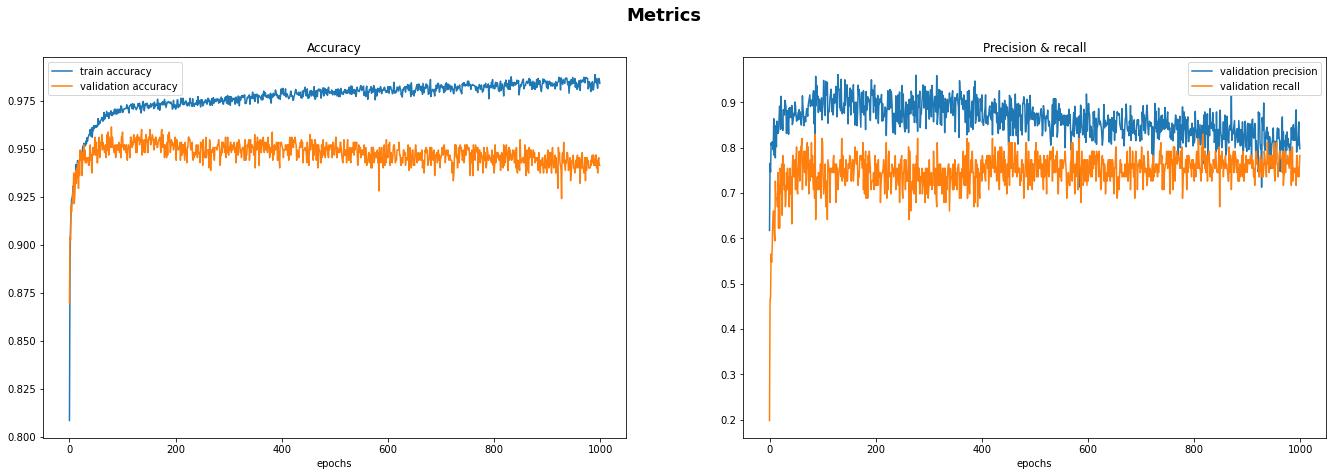

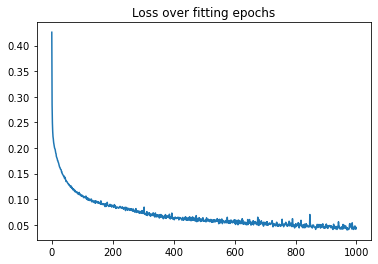

Min loss: 0.04015330597758293


In [12]:
plot_learning_curves(history_loss)
plot_learning_loss(history_loss)

In [13]:
y_pred = model_loss.predict(x_test)
#y_pred

In [14]:
import numpy as np

threshold = 0.5
y_pred = np.where(y_pred<=threshold, 0, 1)


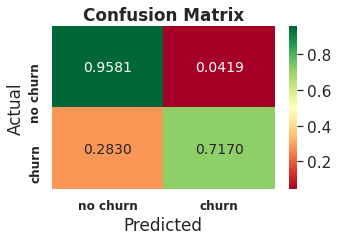


Classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       644
           1       0.74      0.72      0.73       106

    accuracy                           0.92       750
   macro avg       0.85      0.84      0.84       750
weighted avg       0.92      0.92      0.92       750



In [15]:
plot_confusion_matrix(y_test, y_pred, cmap='RdYlGn', normalize='true')
print_classification_report(y_test, y_pred)

## Model with best RECALL

In [16]:
from tensorflow.keras.optimizers import Adam

optimizer= Adam(0.005)

model_rec = build_model(input_shape=inp_shape, hidden_shapes=[32], hidden_activation='relu',
                    opt=optimizer, dropout=0.0, loss='binary_crossentropy')

model_rec.summary()

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


model_rec.compile(
    loss='binary_crossentropy',
    #loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.0005),
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives()])

In [17]:
epo = 1000

CB_checkpoint = ModelCheckpoint(monitor='val_recall', filepath='recall_model.hdf5', save_best_only=True, mode='max', verbose=0)


history_rec = model_rec.fit(x_train, y_train, epochs=epo, validation_data=(x_val, y_val), callbacks=[CB_checkpoint], verbose=0)

In [18]:
# Load best recall modell
model_rec.load_weights('recall_model.hdf5')

model_rec.evaluate(x_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 0.7211 - accuracy: 0.9080 - precision: 0.6412 - recall: 0.7925


[0.7211083769798279,
 0.9079999923706055,
 0.6412213444709778,
 0.7924528121948242]

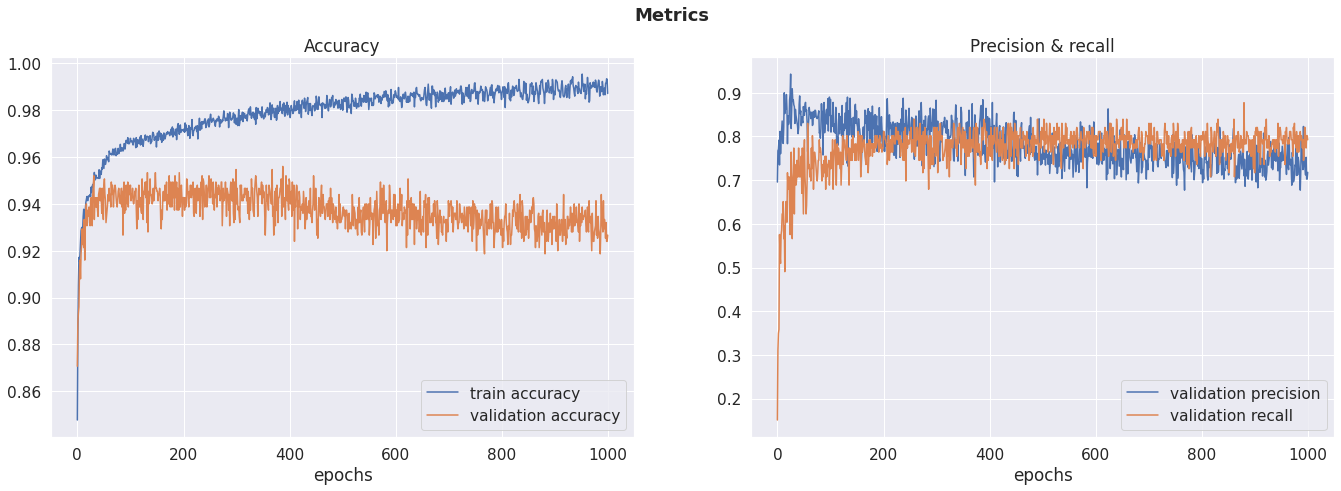

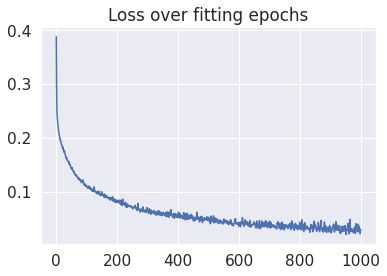

Min loss: 0.02017364092171192


In [19]:
plot_learning_curves(history_rec)
plot_learning_loss(history_rec)

In [20]:
y_pred = model_rec.predict(x_test)
#y_pred

In [21]:
import numpy as np

threshold = 0.5
y_pred = np.where(y_pred<=threshold, 0, 1)



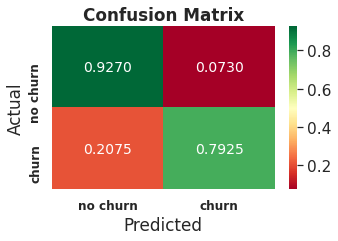


Classification report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       644
           1       0.64      0.79      0.71       106

    accuracy                           0.91       750
   macro avg       0.80      0.86      0.83       750
weighted avg       0.92      0.91      0.91       750



In [22]:
plot_confusion_matrix(y_test, y_pred, cmap='RdYlGn', normalize='true')
print_classification_report(y_test, y_pred)

##  Model with best PRECISION

In [23]:
from tensorflow.keras.optimizers import Adam

optimizer= Adam(0.001)

model_pre = build_model(input_shape=inp_shape, hidden_shapes=[32], hidden_activation='relu',
                    opt=optimizer, dropout=0.0, loss='binary_crossentropy')

model_pre.summary()

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [24]:
epo = 1000

CB_checkpoint = ModelCheckpoint(monitor='val_precision', filepath='precision_model.hdf5', save_best_only=True, mode='max',verbose=0)


history_pre = model_pre.fit(x_train, y_train, epochs=epo, validation_data=(x_val, y_val), callbacks=[CB_checkpoint], verbose=0)

In [25]:
# Load best recall modell
model_pre.load_weights('precision_model.hdf5')

model_pre.evaluate(x_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 0.1857 - accuracy: 0.9427 - precision: 0.8795 - recall: 0.6887    


[0.18574678897857666,
 0.9426666498184204,
 0.8795180916786194,
 0.6886792182922363]

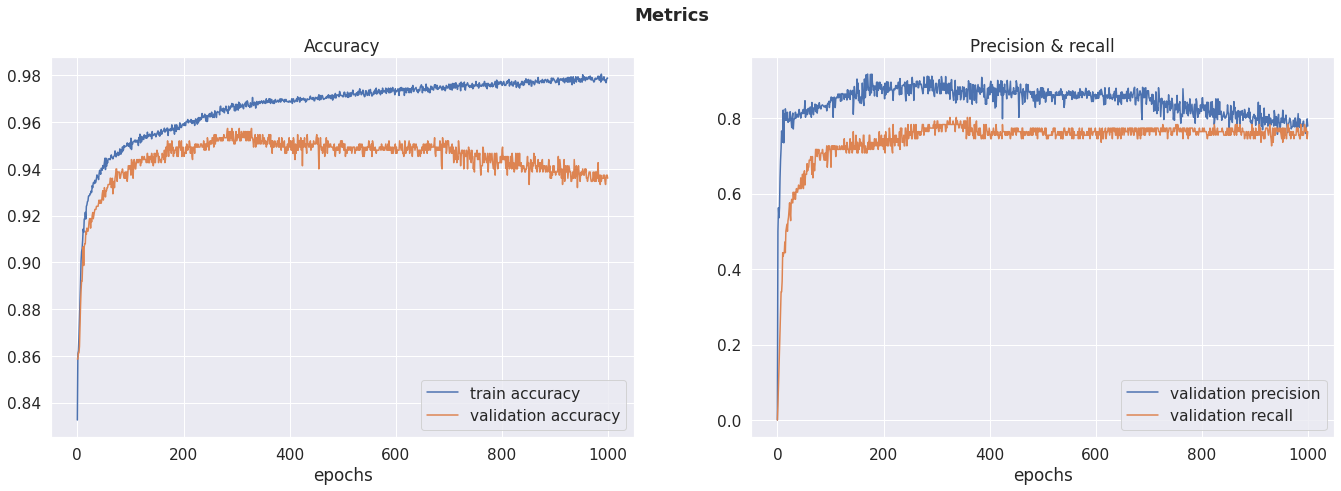

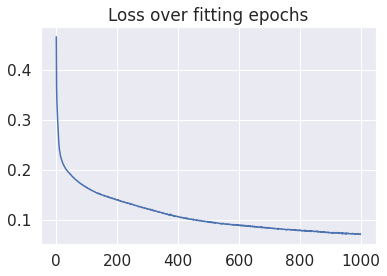

Min loss: 0.07130054384469986


In [26]:
plot_learning_curves(history_pre)
plot_learning_loss(history_pre)

In [27]:
y_pred = model_pre.predict(x_test)
#y_pred

In [28]:
threshold = 0.5
y_pred = np.where(y_pred<=threshold, 0, 1)

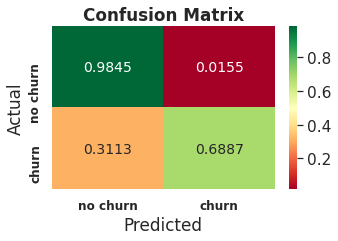


Classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       644
           1       0.88      0.69      0.77       106

    accuracy                           0.94       750
   macro avg       0.92      0.84      0.87       750
weighted avg       0.94      0.94      0.94       750



In [32]:
plot_confusion_matrix(y_test, y_pred, cmap='RdYlGn', normalize='true')
print_classification_report(y_test, y_pred)

# ONE hidden layer - hidden neurons tuning (precision)

In [30]:
from keras.models import load_model

 === Hidden layer size: 16 ===


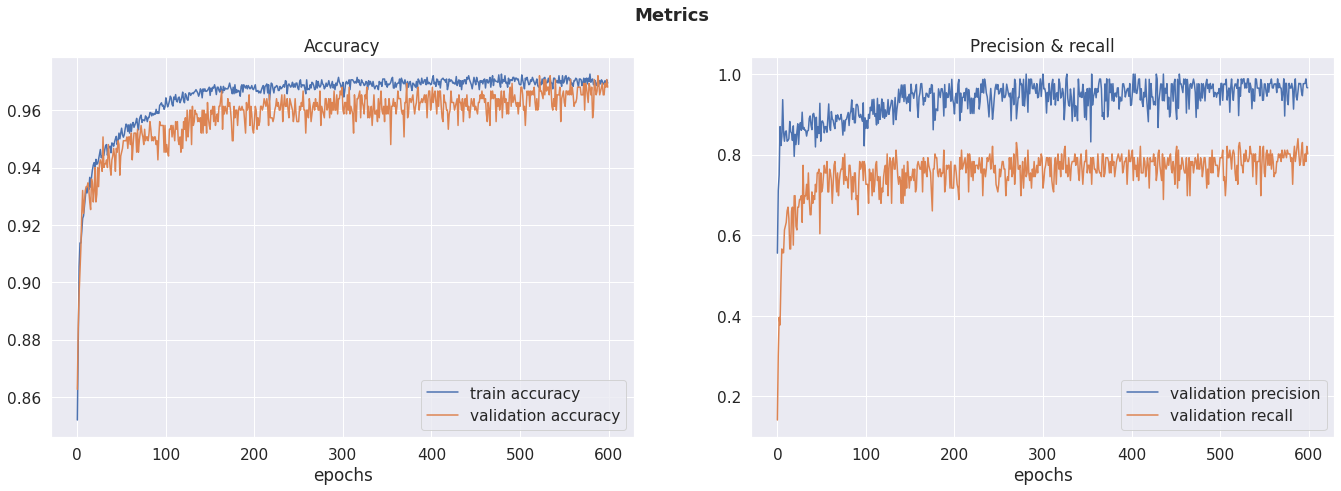

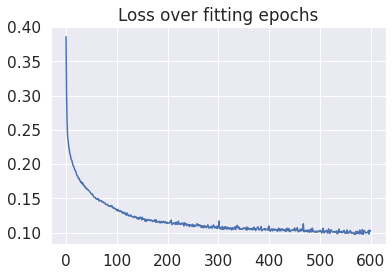

Min loss: 0.09748964756727219


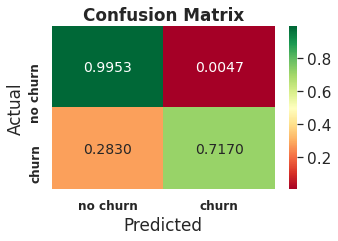


Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.97       644
           1       0.96      0.72      0.82       106

    accuracy                           0.96       750
   macro avg       0.96      0.86      0.90       750
weighted avg       0.96      0.96      0.95       750

 === Hidden layer size: 64 ===


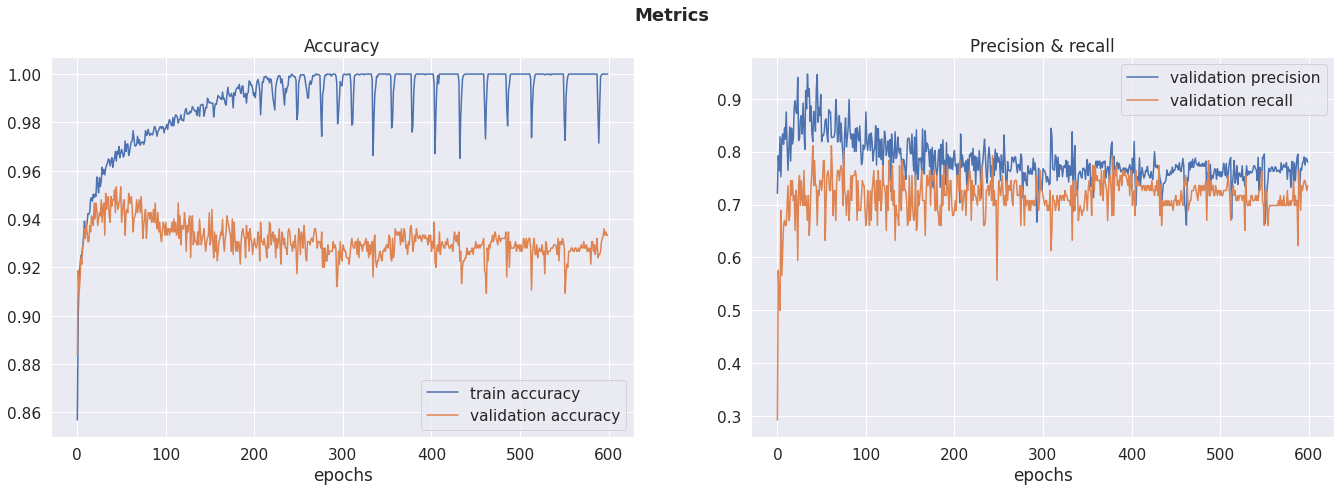

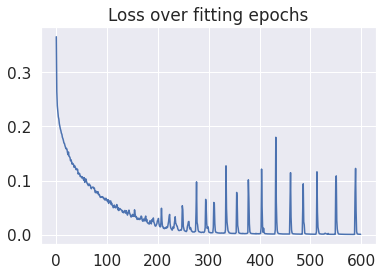

Min loss: 0.0006478287978097796


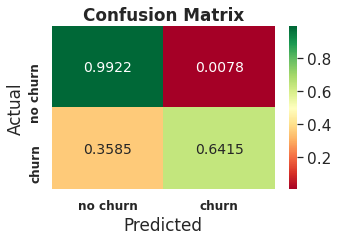


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       644
           1       0.93      0.64      0.76       106

    accuracy                           0.94       750
   macro avg       0.94      0.82      0.86       750
weighted avg       0.94      0.94      0.94       750

 === Hidden layer size: 128 ===


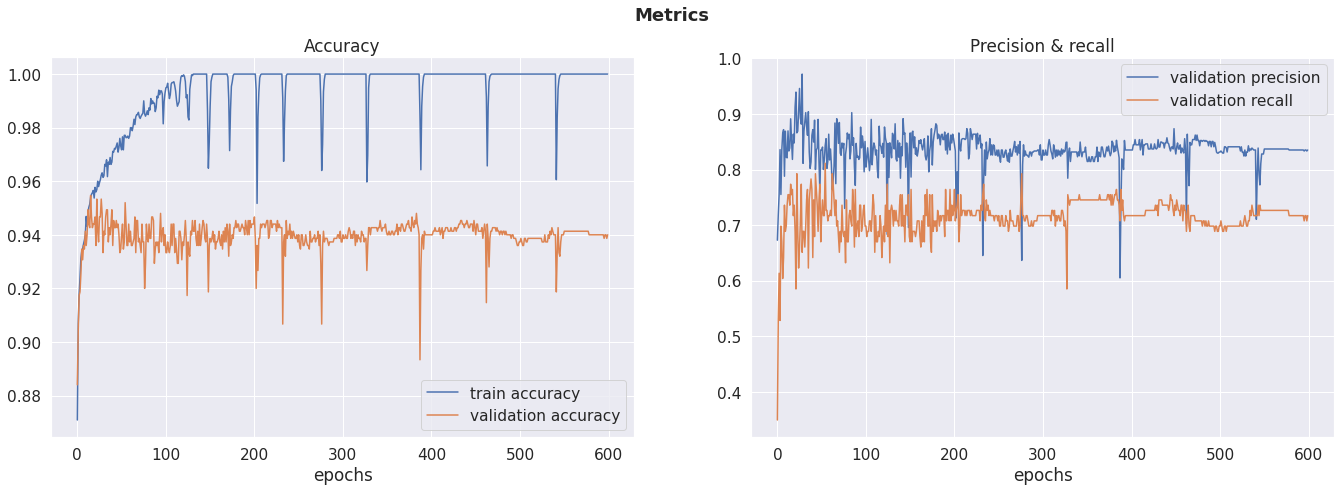

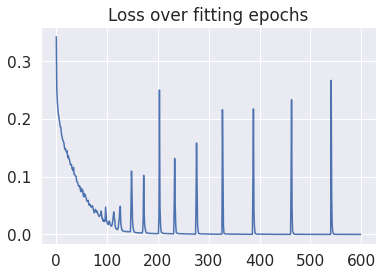

Min loss: 6.158980977488682e-05


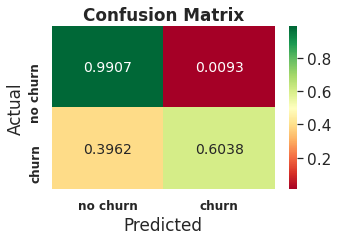


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       644
           1       0.91      0.60      0.73       106

    accuracy                           0.94       750
   macro avg       0.93      0.80      0.85       750
weighted avg       0.93      0.94      0.93       750

 === Hidden layer size: 256 ===


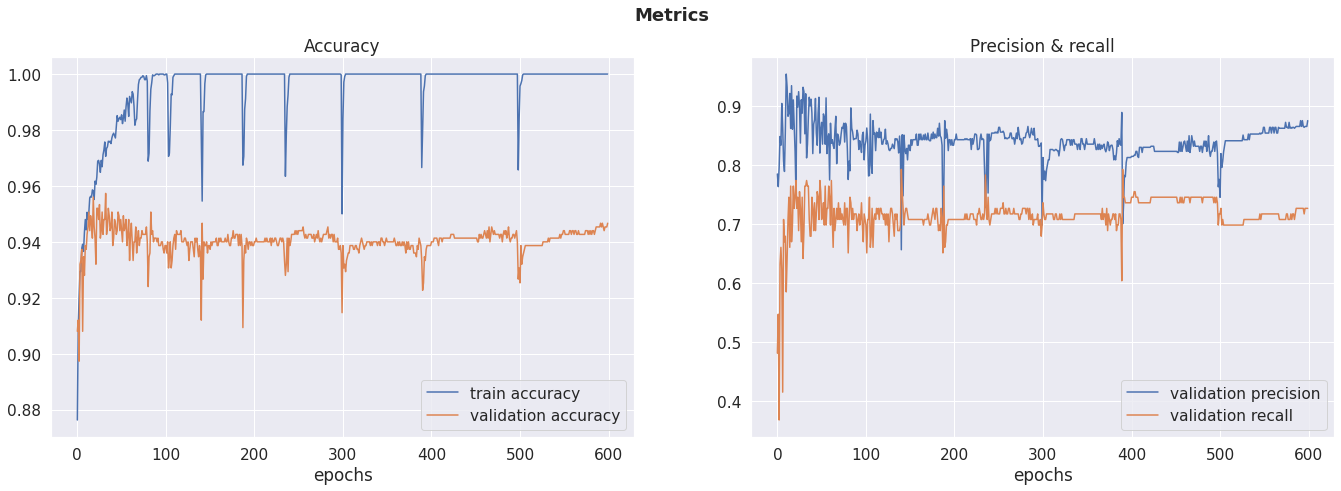

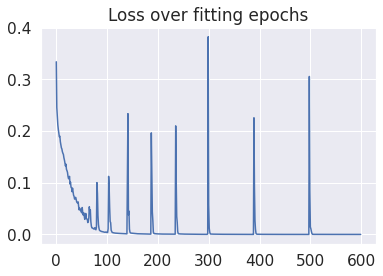

Min loss: 8.07122796686599e-06


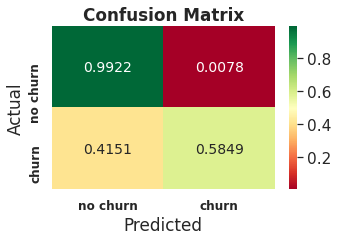


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       644
           1       0.93      0.58      0.72       106

    accuracy                           0.93       750
   macro avg       0.93      0.79      0.84       750
weighted avg       0.93      0.93      0.93       750



In [36]:
epochs = 600

scores_hidden_dict = dict()

for hidden_shape in [16,64,128,256]:#,512,1024,2048]:
    print(" === Hidden layer size:", hidden_shape, "===")

    scores = list()
    optimizer= Adam(0.005)

    model_hidden = build_model(input_shape=inp_shape, hidden_shapes=[hidden_shape], hidden_activation='relu',
                    opt=optimizer, dropout=0.0, loss='binary_crossentropy')

    CB_checkpoint = ModelCheckpoint(monitor='val_precision', filepath='one_lay_rec_model.hdf5', save_best_only=True, mode='max', verbose=0)
    
    hist = model_hidden.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), verbose=0, callbacks=[CB_checkpoint])
    #scores_hidden_dict[hidden_shape] = hist.history['accuracy']
    
    model_hidden.load_weights('one_lay_rec_model.hdf5')
    #model_hidden = load_model('one_lay_rec_model.hdf5')

    
    y_pred = model_hidden.predict(x_test)
    threshold = 0.5
    y_pred = np.where(y_pred<=threshold, 0, 1)
    
    plot_learning_curves(hist)
    plot_learning_loss(hist)
    
    plot_confusion_matrix(y_test, y_pred, cmap='RdYlGn', normalize='true')
    print_classification_report(y_test, y_pred)
    del model_hidden

# Number of hidden layer tuning

In [37]:
# Number of hidden layers

from itertools import combinations_with_replacement, product
from random import sample

# initial set of layer size
x = [8, 16, 32, 64, 128]

# create combinations
c_2 = product(x, repeat=2) # 2 hidden layers
c_3 = product(x, repeat=3) # 3 hidden layers
c_4 = product(x, repeat=4) # 4 hidden layers
c_5 = product(x, repeat=5) # 5 hidden layers


# take 40 random combinations
c_2_sample = sample(list(c_2), 5)
c_3_sample = sample(list(c_3), 5)
c_4_sample = sample(list(c_4), 5)
c_5_sample = sample(list(c_5), 5)

test_comb = c_2_sample + c_3_sample + c_4_sample + c_5_sample

print(f" {len(test_comb)} test combinations chosen:\n{test_comb}")

 20 test combinations chosen:
[(128, 8), (64, 64), (8, 64), (32, 16), (128, 64), (32, 8, 32), (8, 8, 64), (64, 32, 128), (64, 16, 128), (8, 16, 128), (8, 64, 8, 128), (32, 128, 128, 32), (64, 128, 16, 128), (128, 8, 32, 128), (64, 128, 64, 8), (8, 16, 64, 32, 128), (64, 128, 8, 128, 64), (64, 128, 128, 128, 32), (16, 16, 16, 32, 16), (32, 32, 128, 64, 8)]


 === Hidden layer size: (128, 8) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 128)               1792      
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 8)                 1032      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 2,833
Trainable params: 2,833
Non-trainable params: 0
_________________________________________________________________


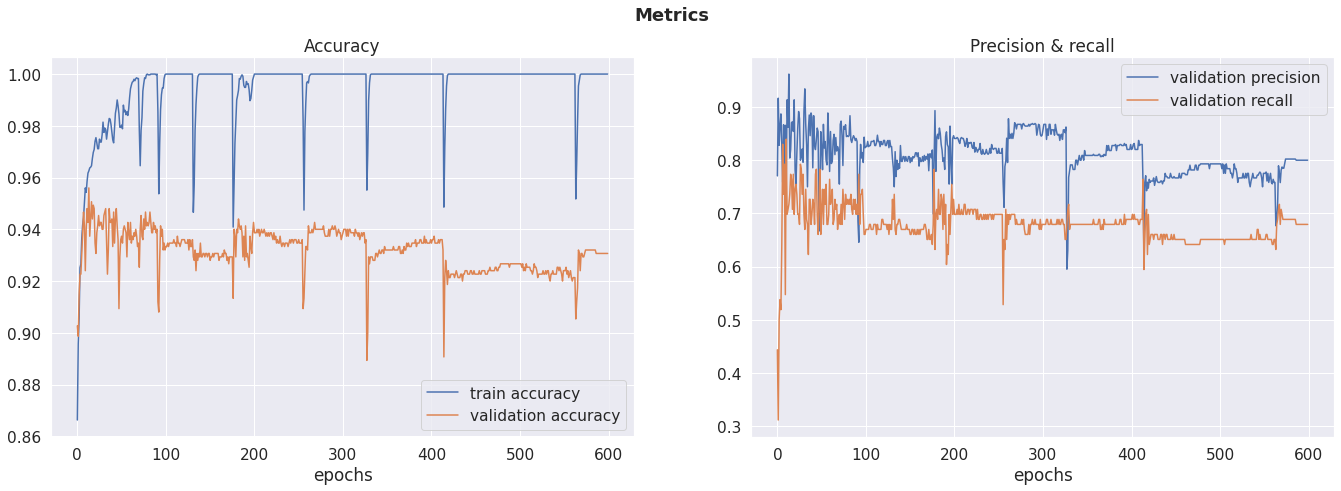

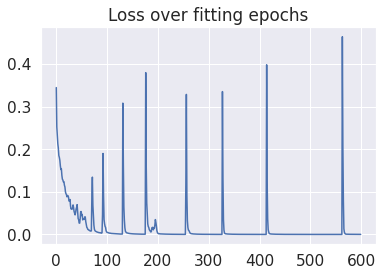

Min loss: 9.378929348713427e-07


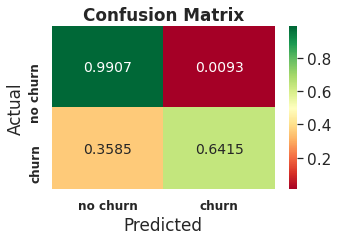


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       644
           1       0.92      0.64      0.76       106

    accuracy                           0.94       750
   macro avg       0.93      0.82      0.86       750
weighted avg       0.94      0.94      0.94       750

 === Hidden layer size: (64, 64) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 64)                896       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)            

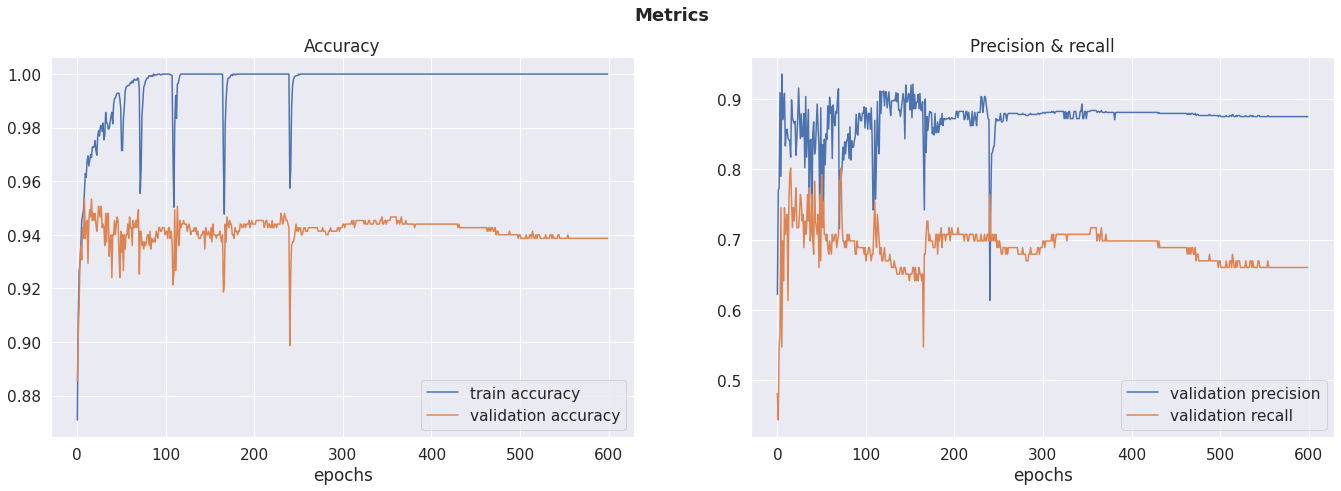

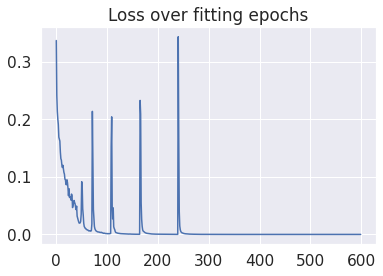

Min loss: 8.281291763445608e-10


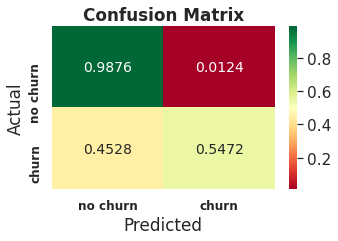


Classification report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       644
           1       0.88      0.55      0.67       106

    accuracy                           0.93       750
   macro avg       0.90      0.77      0.82       750
weighted avg       0.92      0.93      0.92       750

 === Hidden layer size: (8, 64) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 8)                 112       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 1)             

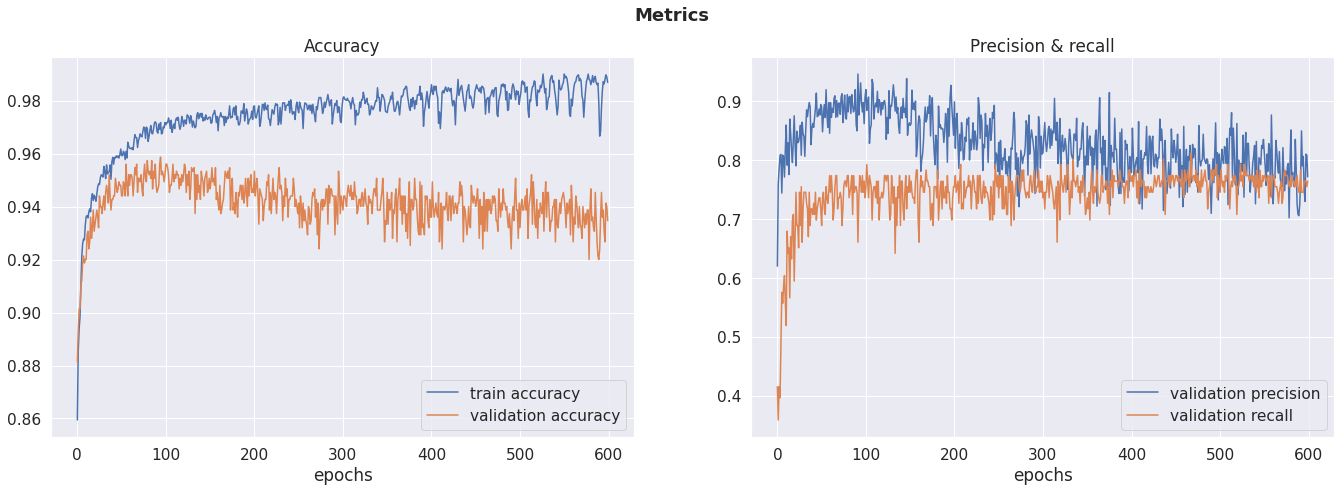

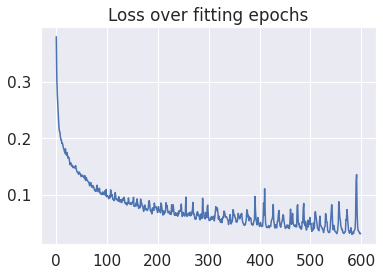

Min loss: 0.030324500054121017


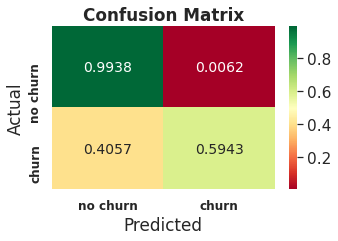


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       644
           1       0.94      0.59      0.73       106

    accuracy                           0.94       750
   macro avg       0.94      0.79      0.85       750
weighted avg       0.94      0.94      0.93       750

 === Hidden layer size: (32, 16) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 32)                448       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 1)            

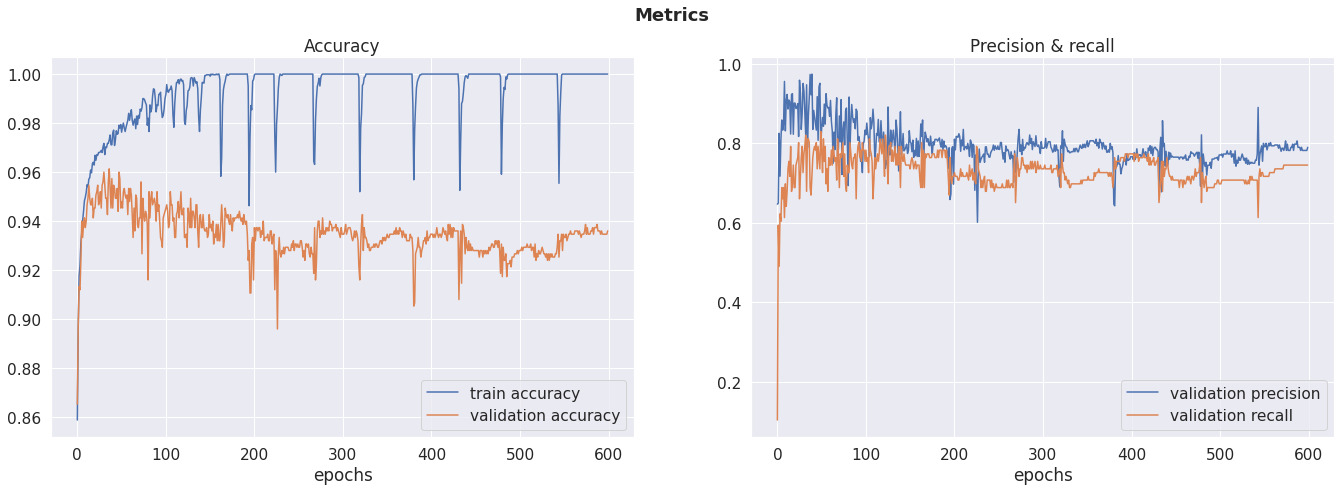

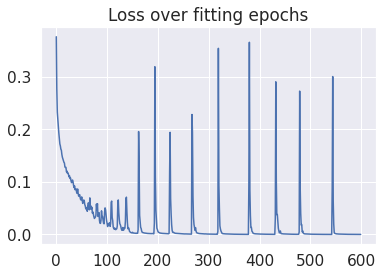

Min loss: 0.00010645066504366696


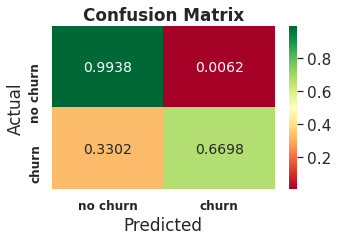


Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       644
           1       0.95      0.67      0.78       106

    accuracy                           0.95       750
   macro avg       0.95      0.83      0.88       750
weighted avg       0.95      0.95      0.94       750

 === Hidden layer size: (128, 64) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 128)               1792      
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)           

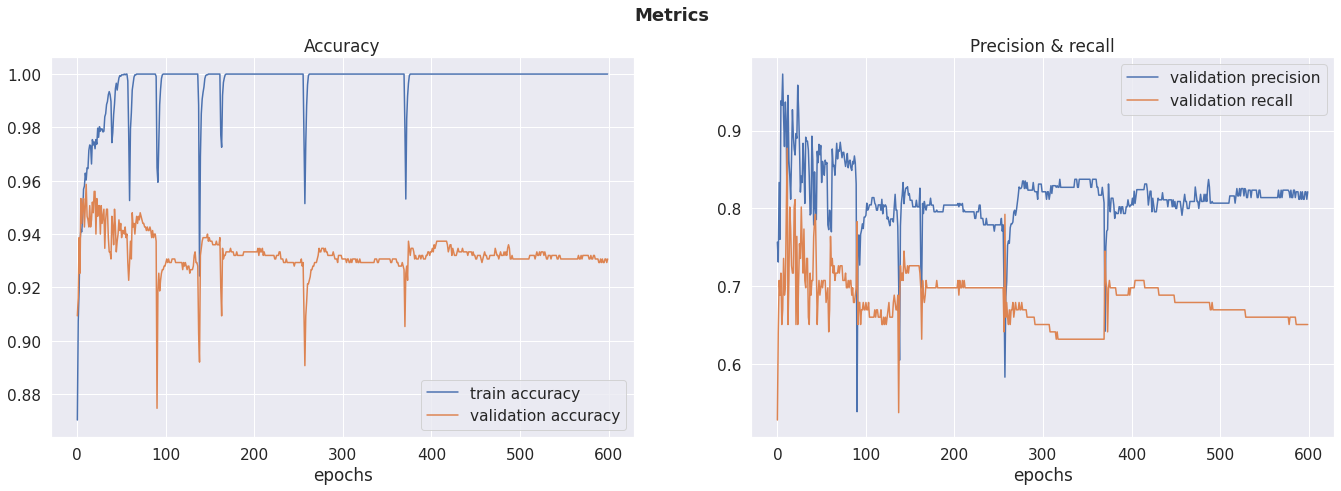

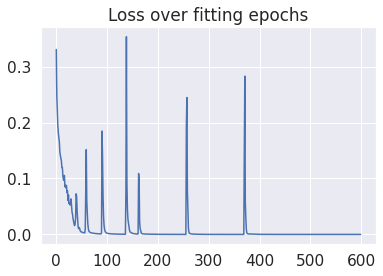

Min loss: 2.2432271595818065e-09


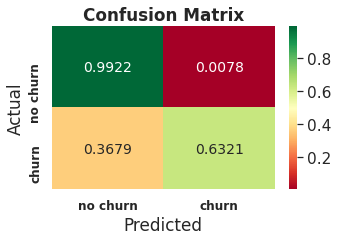


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       644
           1       0.93      0.63      0.75       106

    accuracy                           0.94       750
   macro avg       0.94      0.81      0.86       750
weighted avg       0.94      0.94      0.94       750

 === Hidden layer size: (32, 8, 32) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 32)                448       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 8)                 264       
_________________________________________________________________
hidden_dense_3 (Dense)       (None, 32)        

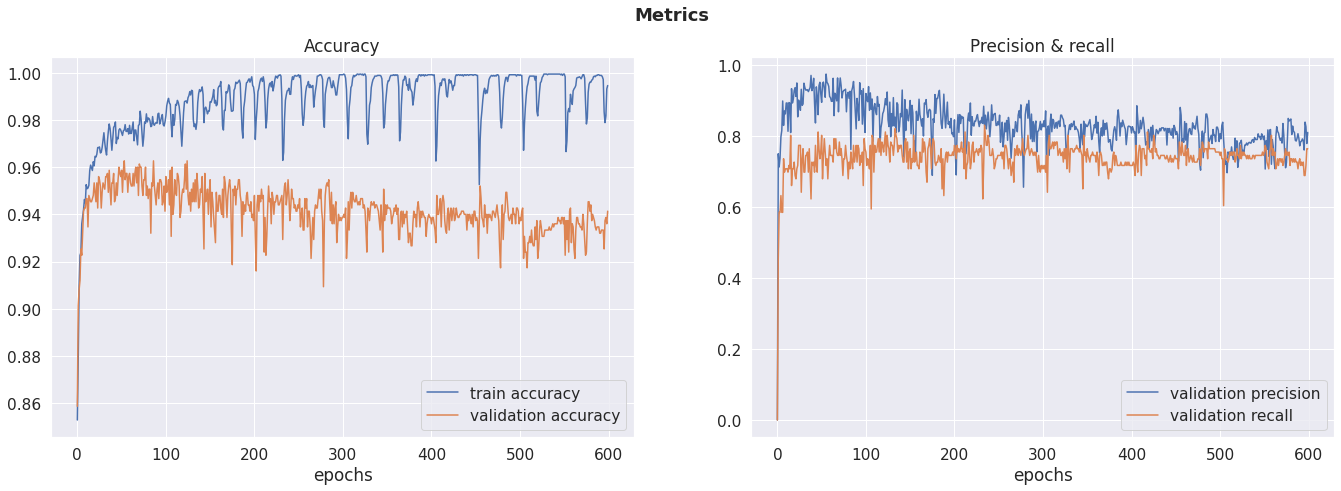

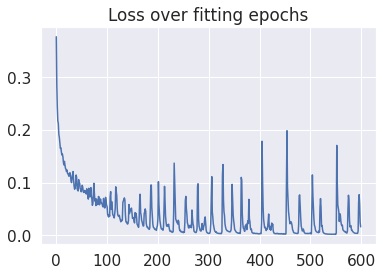

Min loss: 0.0016061131609603763


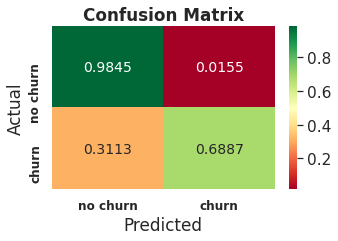


Classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       644
           1       0.88      0.69      0.77       106

    accuracy                           0.94       750
   macro avg       0.92      0.84      0.87       750
weighted avg       0.94      0.94      0.94       750

 === Hidden layer size: (8, 8, 64) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 8)                 112       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 8)                 72        
_________________________________________________________________
hidden_dense_3 (Dense)       (None, 64)         

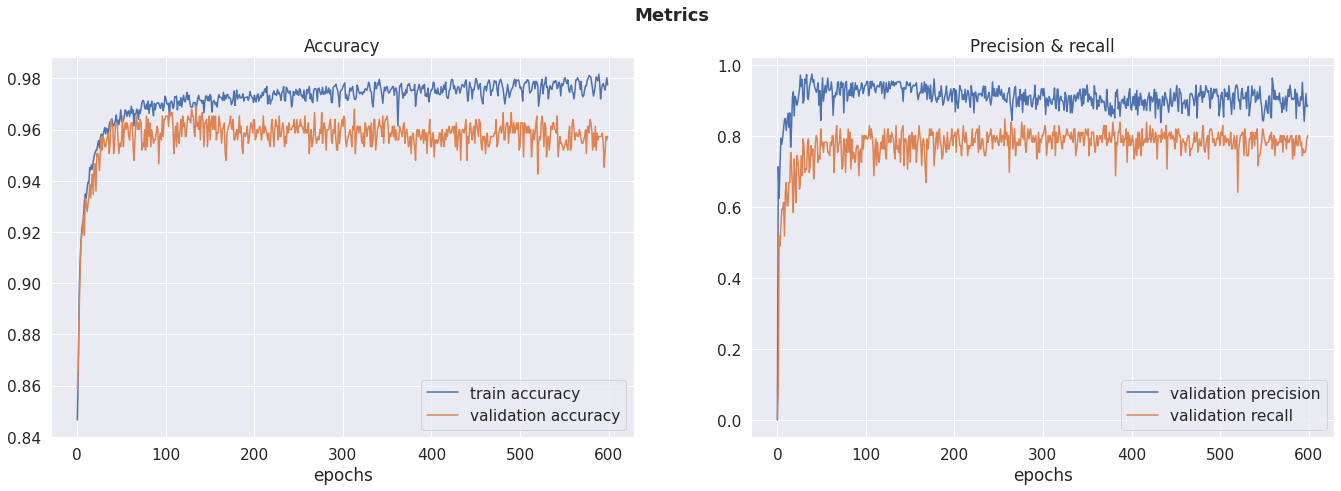

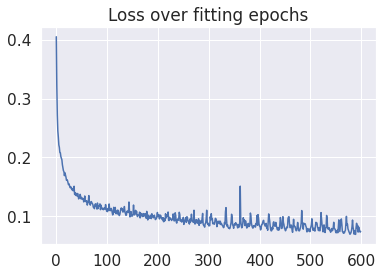

Min loss: 0.0691801905632019


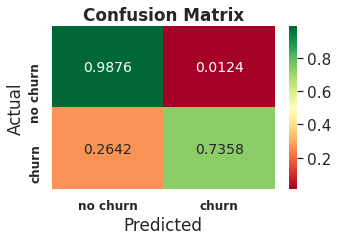


Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       644
           1       0.91      0.74      0.81       106

    accuracy                           0.95       750
   macro avg       0.93      0.86      0.89       750
weighted avg       0.95      0.95      0.95       750

 === Hidden layer size: (64, 32, 128) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 64)                896       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 32)                2080      
_________________________________________________________________
hidden_dense_3 (Dense)       (None, 128)     

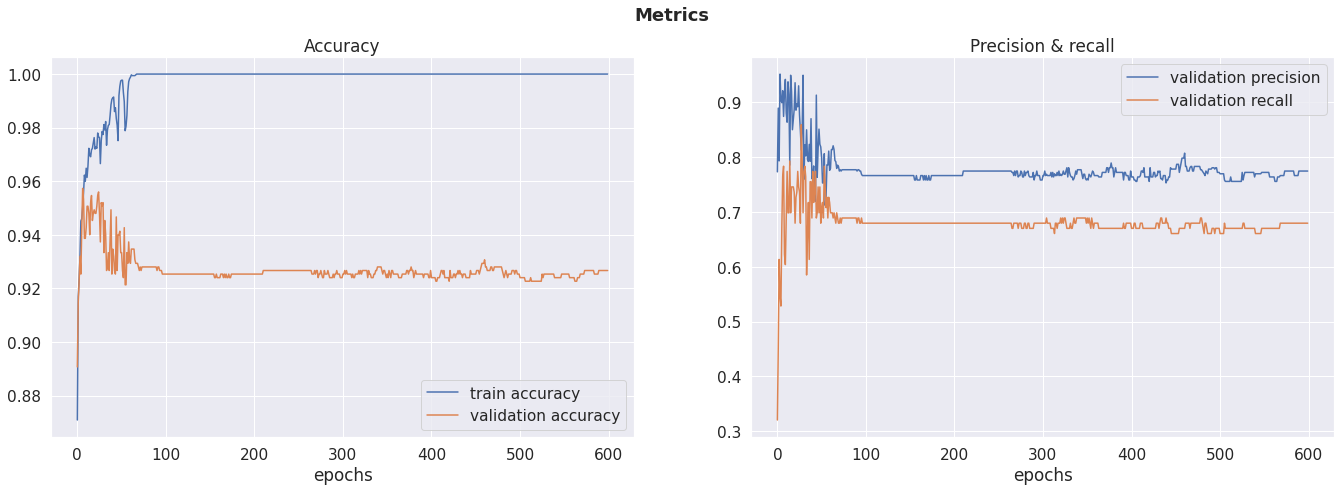

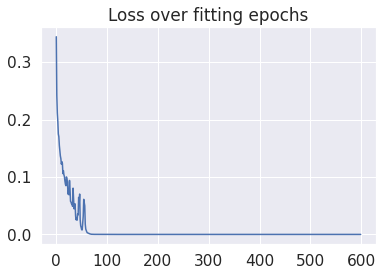

Min loss: 2.7004434799415833e-10


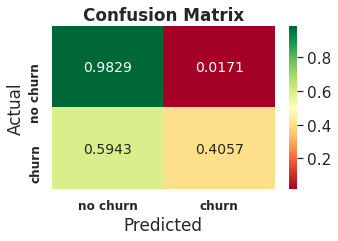


Classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       644
           1       0.80      0.41      0.54       106

    accuracy                           0.90       750
   macro avg       0.85      0.69      0.74       750
weighted avg       0.89      0.90      0.89       750

 === Hidden layer size: (64, 16, 128) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 64)                896       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 16)                1040      
_________________________________________________________________
hidden_dense_3 (Dense)       (None, 128)     

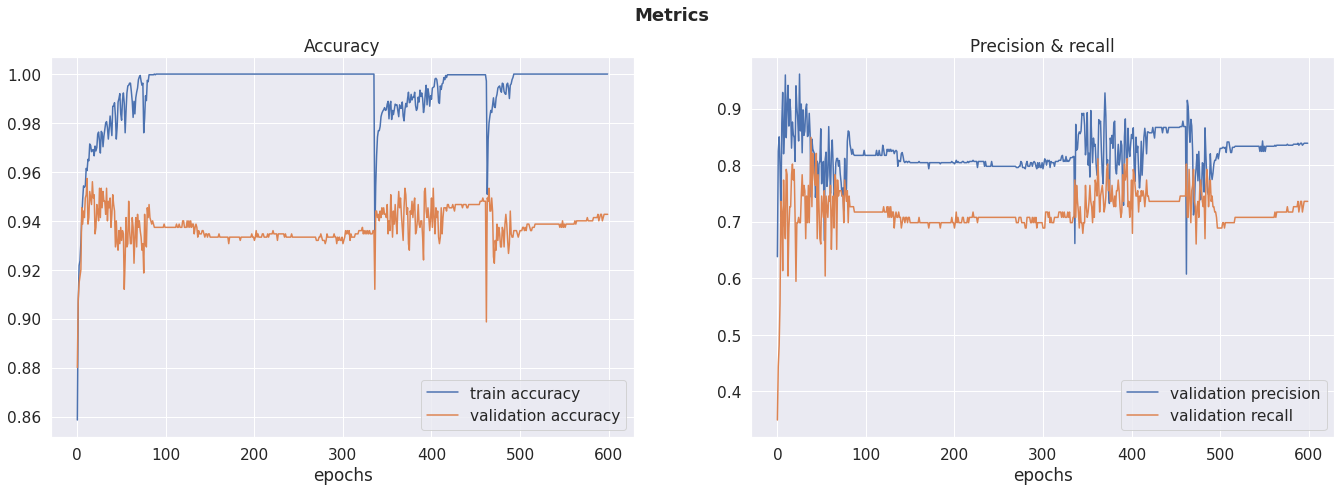

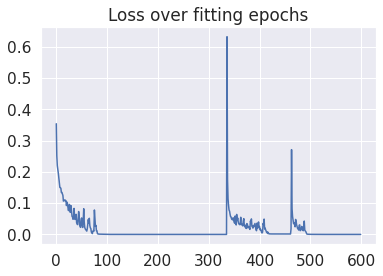

Min loss: 5.207736464285517e-10


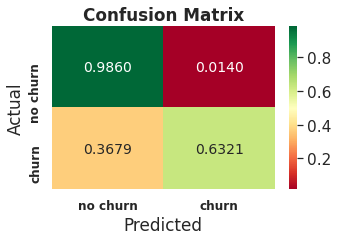


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       644
           1       0.88      0.63      0.74       106

    accuracy                           0.94       750
   macro avg       0.91      0.81      0.85       750
weighted avg       0.93      0.94      0.93       750

 === Hidden layer size: (8, 16, 128) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 8)                 112       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 16)                144       
_________________________________________________________________
hidden_dense_3 (Dense)       (None, 128)      

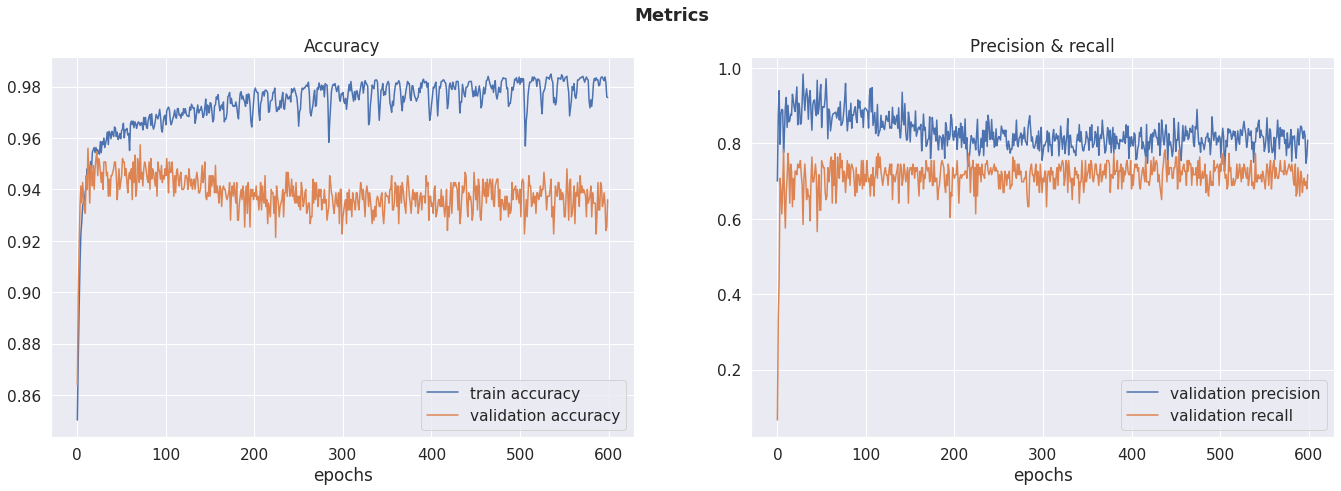

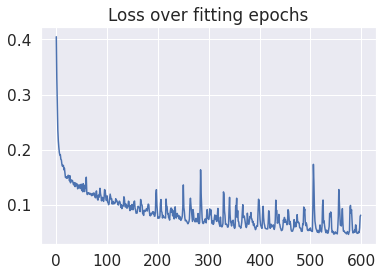

Min loss: 0.04649612307548523


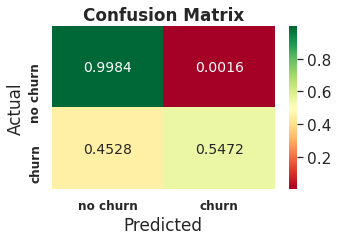


Classification report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       644
           1       0.98      0.55      0.70       106

    accuracy                           0.93       750
   macro avg       0.96      0.77      0.83       750
weighted avg       0.94      0.93      0.93       750

 === Hidden layer size: (8, 64, 8, 128) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 8)                 112       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 64)                576       
_________________________________________________________________
hidden_dense_3 (Dense)       (None, 8)     

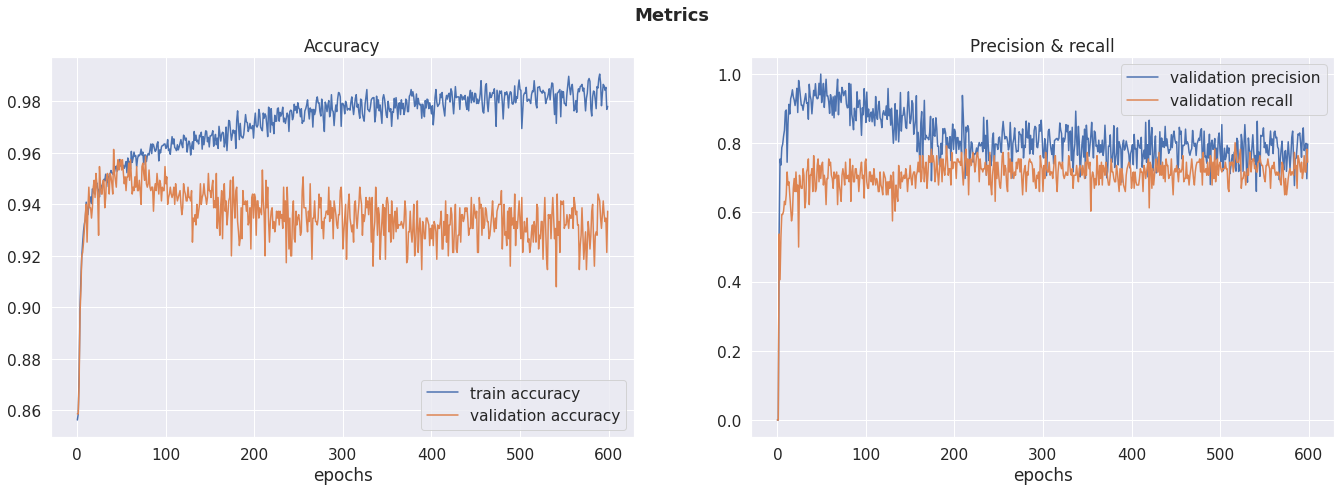

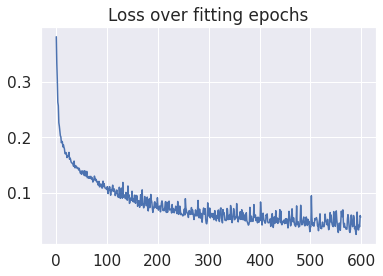

Min loss: 0.025907568633556366


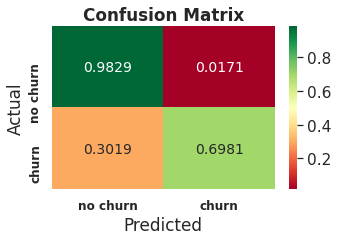


Classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       644
           1       0.87      0.70      0.77       106

    accuracy                           0.94       750
   macro avg       0.91      0.84      0.87       750
weighted avg       0.94      0.94      0.94       750

 === Hidden layer size: (32, 128, 128, 32) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 32)                448       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 128)               4224      
_________________________________________________________________
hidden_dense_3 (Dense)       (None, 128)

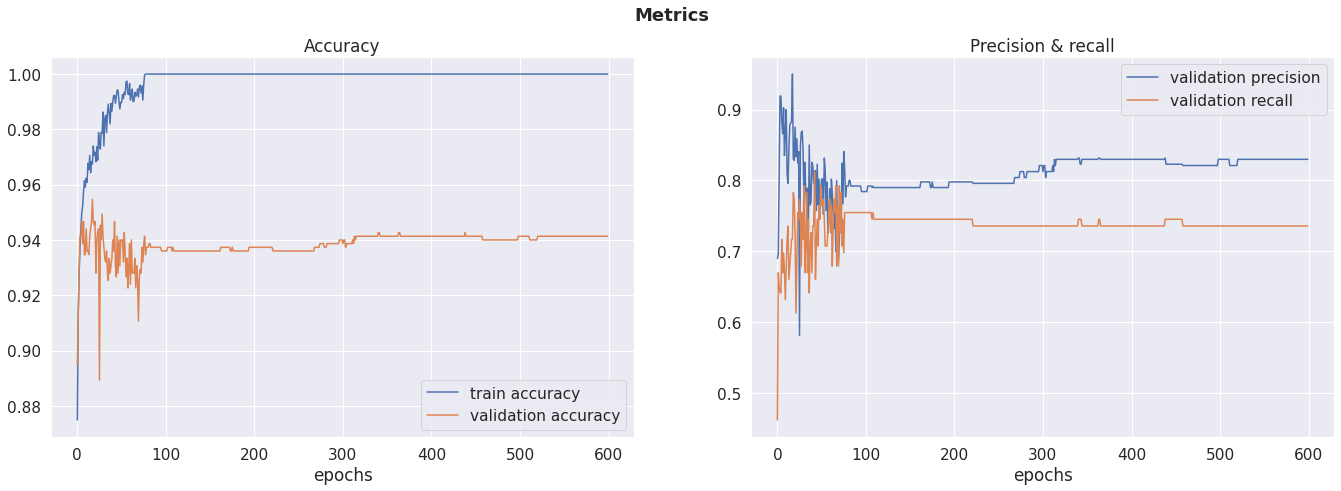

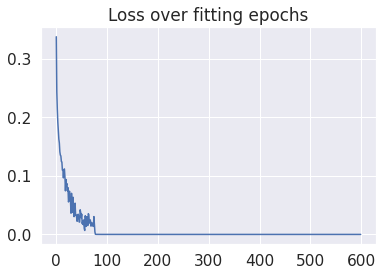

Min loss: 9.829395630767124e-11


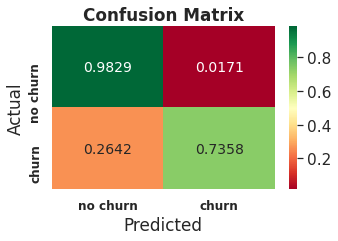


Classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       644
           1       0.88      0.74      0.80       106

    accuracy                           0.95       750
   macro avg       0.92      0.86      0.89       750
weighted avg       0.95      0.95      0.95       750

 === Hidden layer size: (64, 128, 16, 128) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 64)                896       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 128)               8320      
_________________________________________________________________
hidden_dense_3 (Dense)       (None, 16) 

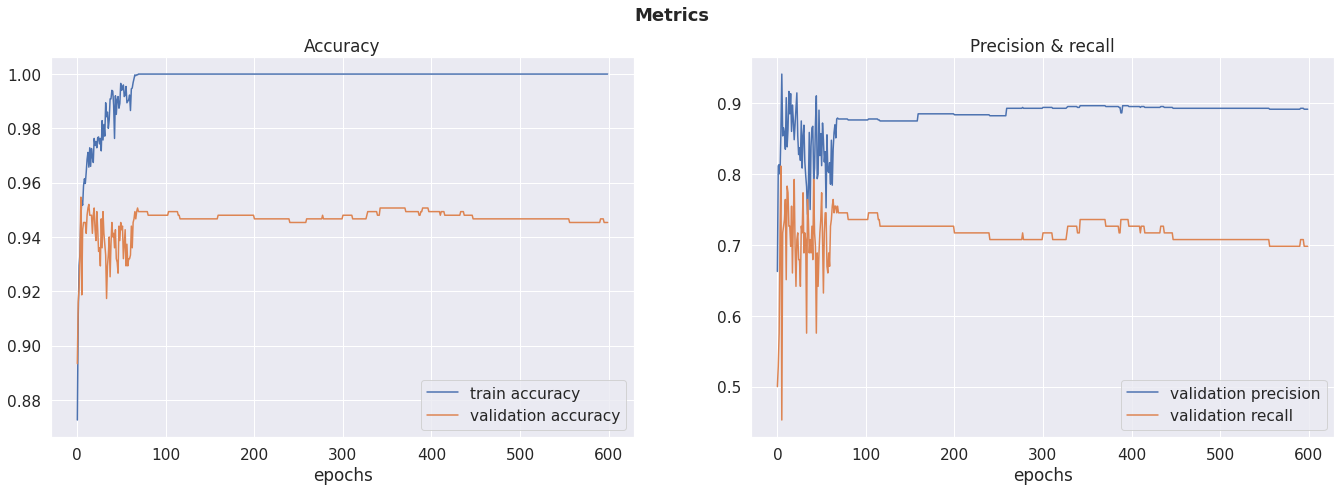

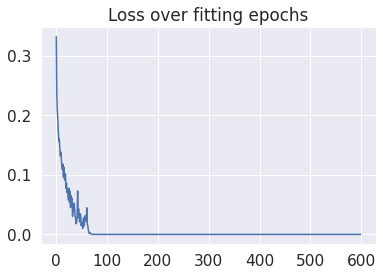

Min loss: 3.3014618816551433e-10


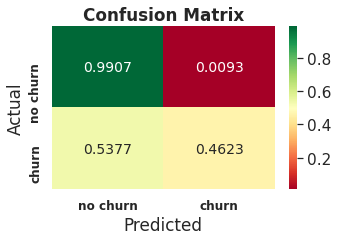


Classification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       644
           1       0.89      0.46      0.61       106

    accuracy                           0.92       750
   macro avg       0.90      0.73      0.78       750
weighted avg       0.91      0.92      0.90       750

 === Hidden layer size: (128, 8, 32, 128) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 128)               1792      
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 8)                 1032      
_________________________________________________________________
hidden_dense_3 (Dense)       (None, 32)  

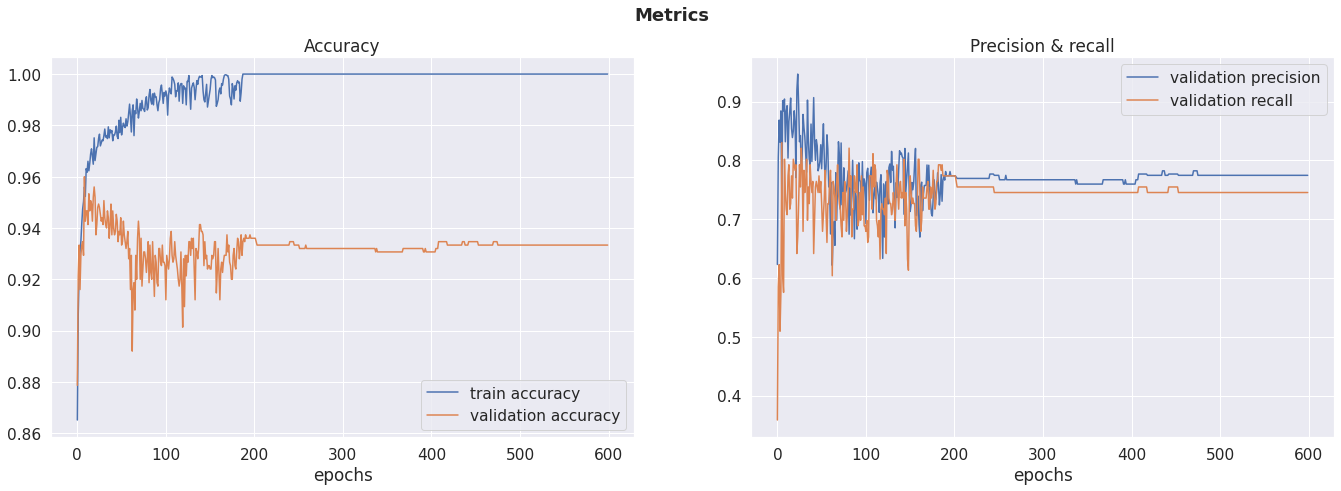

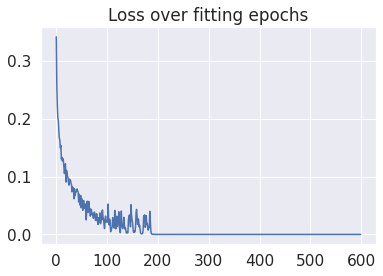

Min loss: 3.0051372501560536e-10


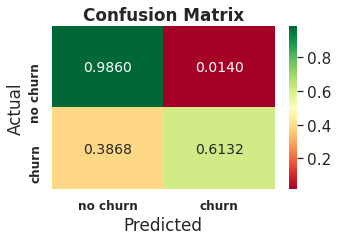


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       644
           1       0.88      0.61      0.72       106

    accuracy                           0.93       750
   macro avg       0.91      0.80      0.84       750
weighted avg       0.93      0.93      0.93       750

 === Hidden layer size: (64, 128, 64, 8) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 64)                896       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 128)               8320      
_________________________________________________________________
hidden_dense_3 (Dense)       (None, 64)   

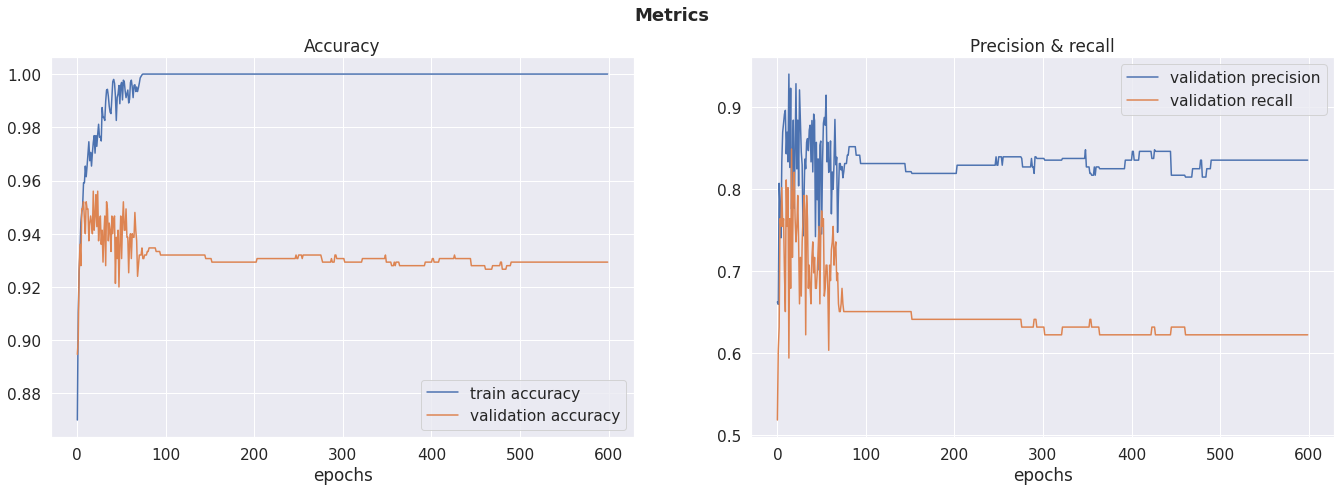

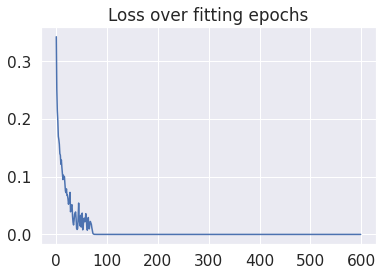

Min loss: 8.450307120710931e-11


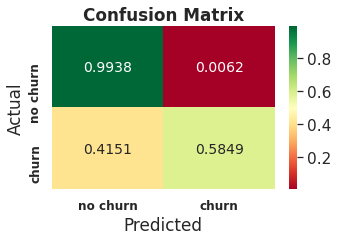


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       644
           1       0.94      0.58      0.72       106

    accuracy                           0.94       750
   macro avg       0.94      0.79      0.84       750
weighted avg       0.94      0.94      0.93       750

 === Hidden layer size: (8, 16, 64, 32, 128) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 8)                 112       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 16)                144       
_________________________________________________________________
hidden_dense_3 (Dense)       (None, 64

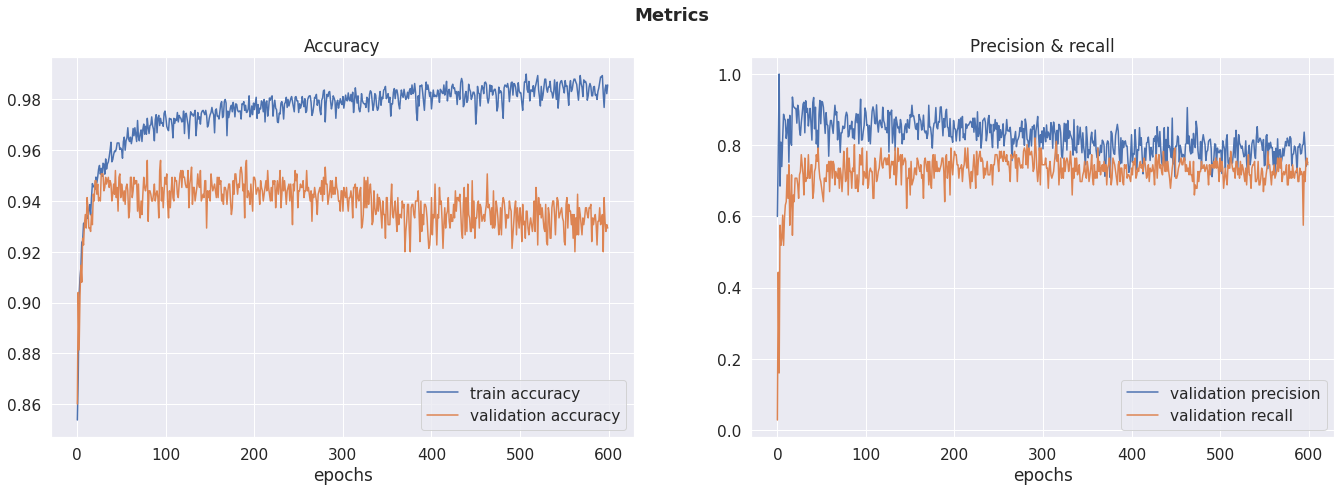

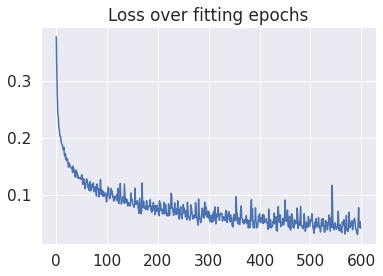

Min loss: 0.030367590487003326


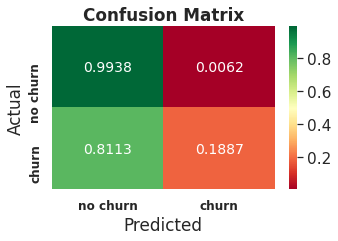


Classification report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       644
           1       0.83      0.19      0.31       106

    accuracy                           0.88       750
   macro avg       0.86      0.59      0.62       750
weighted avg       0.87      0.88      0.85       750

 === Hidden layer size: (64, 128, 8, 128, 64) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 64)                896       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 128)               8320      
_________________________________________________________________
hidden_dense_3 (Dense)       (None, 8

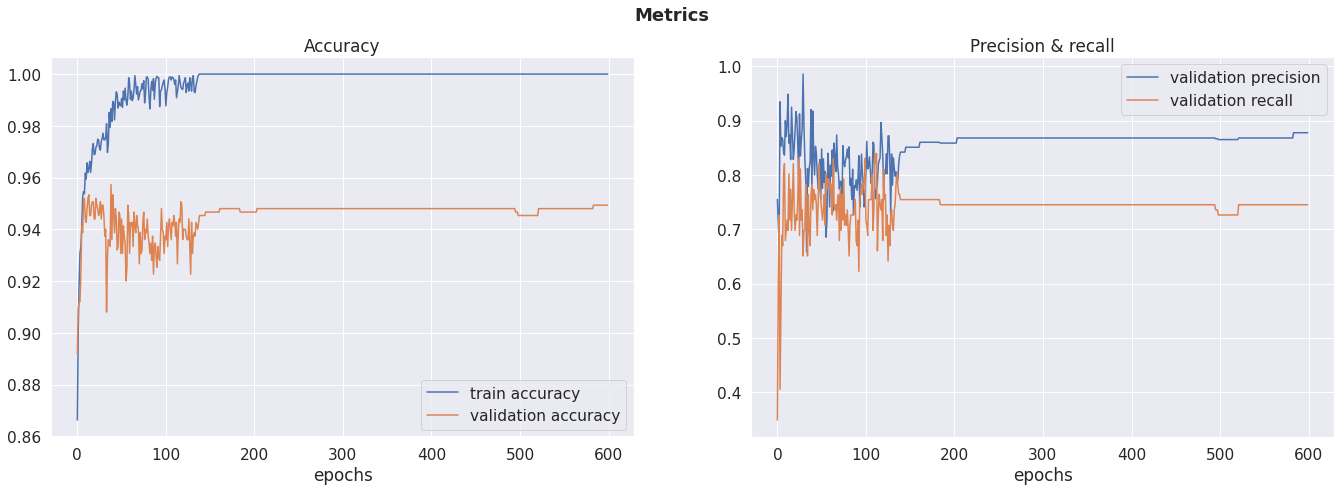

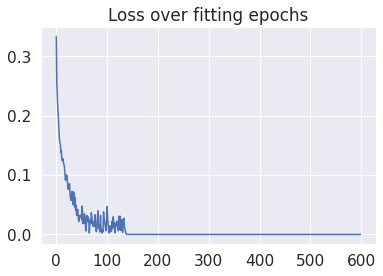

Min loss: 6.620730352846493e-11


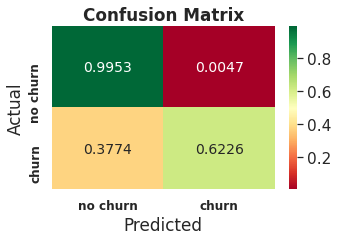


Classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       644
           1       0.96      0.62      0.75       106

    accuracy                           0.94       750
   macro avg       0.95      0.81      0.86       750
weighted avg       0.94      0.94      0.94       750

 === Hidden layer size: (64, 128, 128, 128, 32) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 64)                896       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 128)               8320      
_________________________________________________________________
hidden_dense_3 (Dense)       (None,

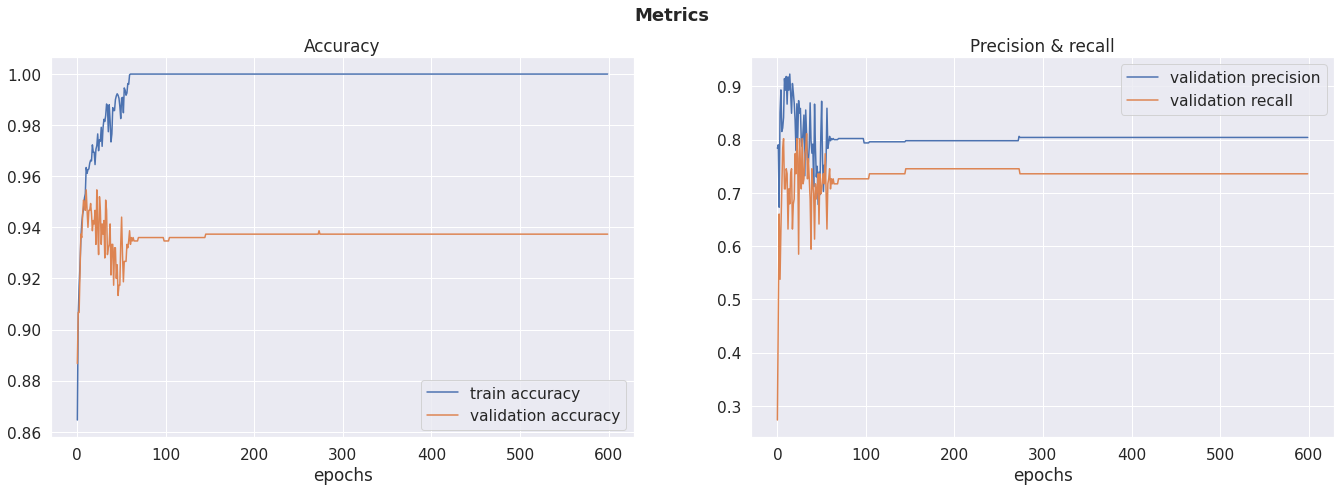

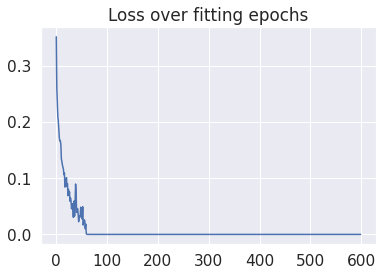

Min loss: 7.9351823722984e-11


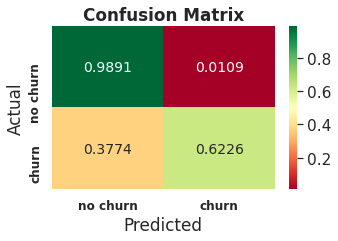


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       644
           1       0.90      0.62      0.74       106

    accuracy                           0.94       750
   macro avg       0.92      0.81      0.85       750
weighted avg       0.94      0.94      0.93       750

 === Hidden layer size: (16, 16, 16, 32, 16) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 16)                224       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 16)                272       
_________________________________________________________________
hidden_dense_3 (Dense)       (None, 16

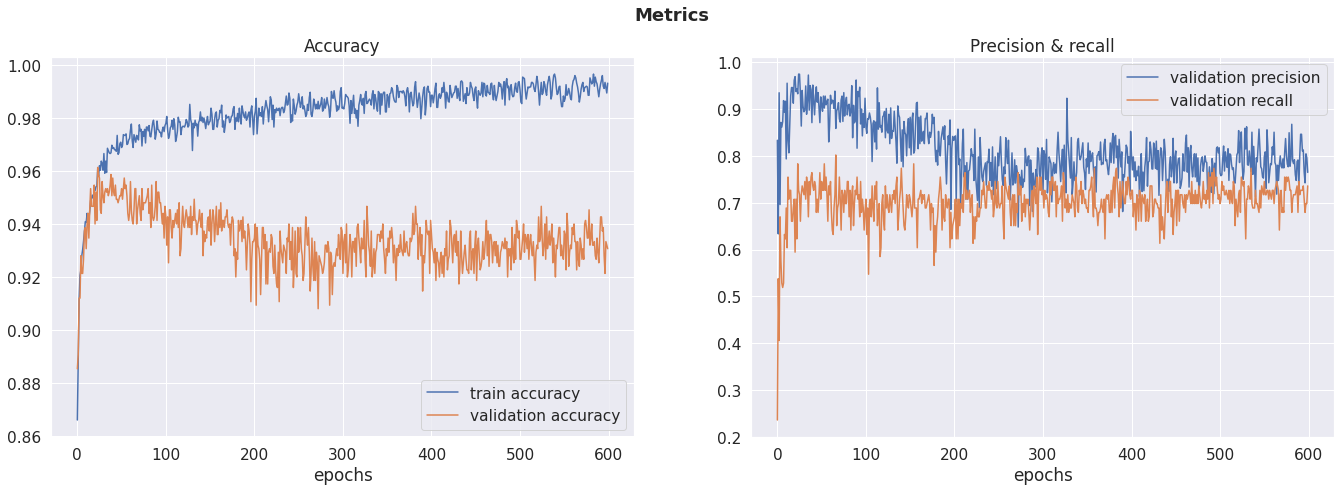

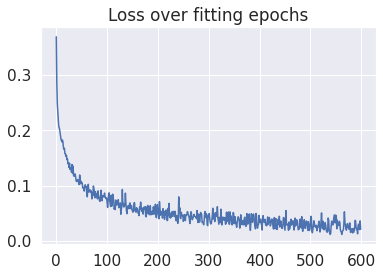

Min loss: 0.012034132145345211


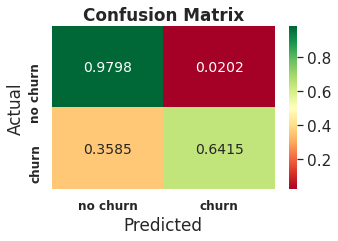


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       644
           1       0.84      0.64      0.73       106

    accuracy                           0.93       750
   macro avg       0.89      0.81      0.84       750
weighted avg       0.93      0.93      0.93       750

 === Hidden layer size: (32, 32, 128, 64, 8) ===

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 32)                448       
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 32)                1056      
_________________________________________________________________
hidden_dense_3 (Dense)       (None, 12

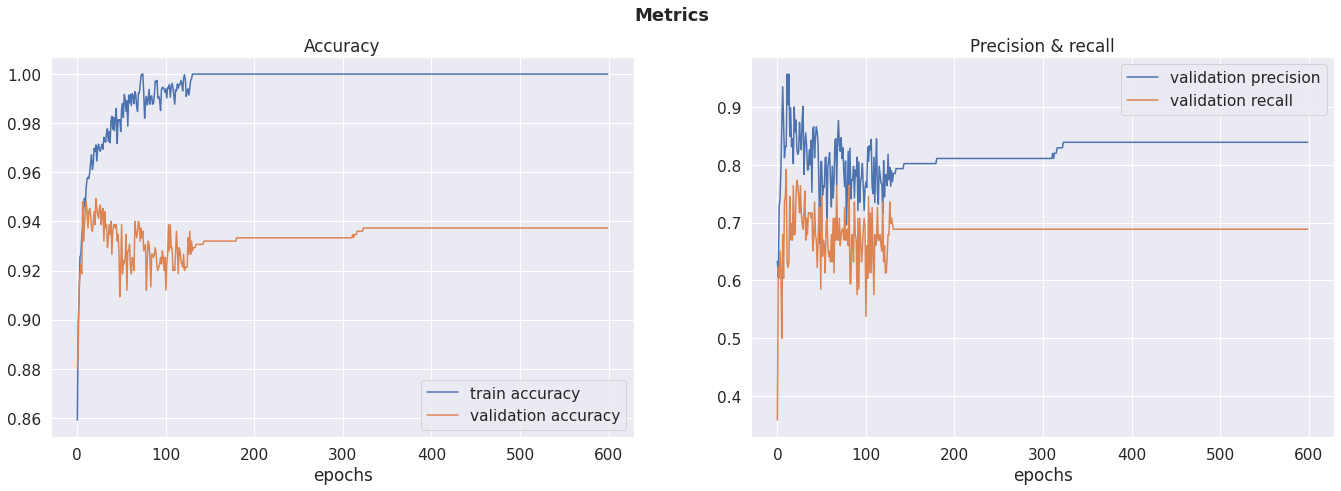

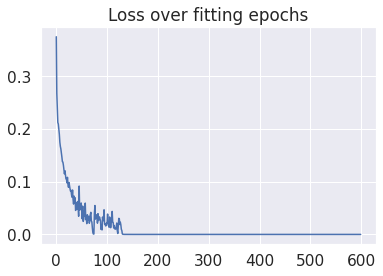

Min loss: 8.911647114695498e-11


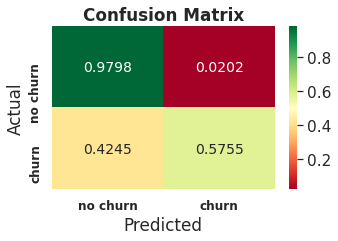


Classification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       644
           1       0.82      0.58      0.68       106

    accuracy                           0.92       750
   macro avg       0.88      0.78      0.82       750
weighted avg       0.92      0.92      0.92       750



In [38]:
epochs = 600

scores_hidden_dict = dict()

for hidden_shape in test_comb:
    print(" === Hidden layer size:", hidden_shape, "===\n")

    scores = list()
    optimizer= Adam(0.005)

    model_hidden = build_model(input_shape=inp_shape, hidden_shapes=hidden_shape, hidden_activation='relu',
                    opt=optimizer, dropout=0.0, loss='binary_crossentropy')
    model_hidden.summary()

    CB_checkpoint = ModelCheckpoint(monitor='val_precision', filepath='multi_lay_rec_model.hdf5', save_weights_only=True, save_best_only=True, mode='max', verbose=0)
    
    hist = model_hidden.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), verbose=0, callbacks=[CB_checkpoint])
    
    model_hidden.load_weights('multi_lay_rec_model.hdf5')
    #scores_hidden_dict[hidden_shape] = hist.history['accuracy']
    
    y_pred = model_hidden.predict(x_test)
    threshold = 0.5
    y_pred = np.where(y_pred<=threshold, 0, 1)
    
    plot_learning_curves(hist)
    plot_learning_loss(hist)
    
    plot_confusion_matrix(y_test, y_pred, cmap='RdYlGn', normalize='true')
    print_classification_report(y_test, y_pred)
    del model_hidden